In [1]:
from Library import *
import seaborn as sns
import d2l as d2l

### VECTOR
* np.linalg.norm : độ lớn của vector
* df.quantile(): phần trăm trên hoặc dưới
* dot : tích vô hướng 

In [4]:
npx.set_np()
lst1 = [
    [1,2,3],
    [1,2,3],
    [1,2,3],
    [1,2,3]
]
t = np.array([lst1,lst1])
t,np.linalg.norm(t) #do lon cua vector 

(array([[[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],
 
        [[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]]]),
 array(10.583006))

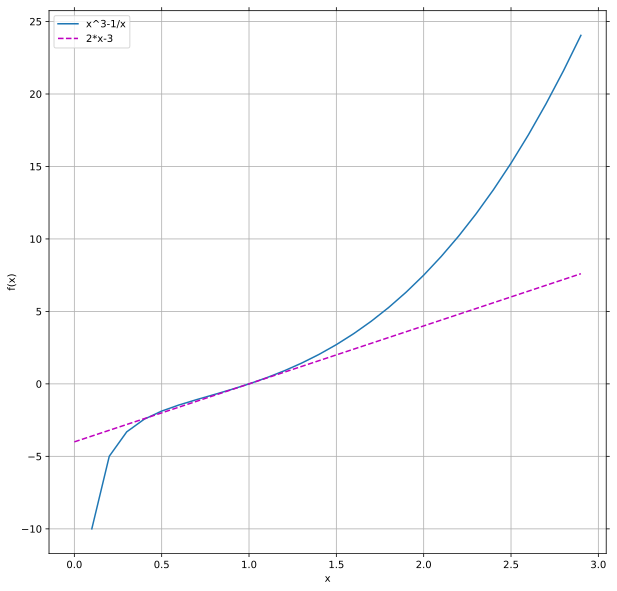

In [5]:
def f(x):
    return x**3 - 1/x
def number(x,h):
    return (f(x+h)-f(x))/h
npx.set_np()
h = 0.1
x = np.arange(0,3,0.1)
d2l.plot(x,[f(x),4*(x-1)],'x','f(x)',legend = ['x^3-1/x','2*x-3'],figsize = (10,10),)


## Phép tính vi phân
* .attach_grad: cấp phát bộ nhớ cho ndarray, khởi tạo mảng 0 để k đc cập nhật trc khi tính toán  
    * (Tương tự u = u.detach())
* backward(): tính gradient(đạo hàm từng thành phần)
* .grad: tính đạo hàm theo biến
* autograd.record() : để lưu quá trình tính

In [59]:
npx.set_np()
x = np.arange(4)
x.attach_grad()
y = np.ones(4) * 2
y.attach_grad()
with autograd.record():
    u = x*y
    u.attach_grad()
    z = 5*u-x
z.backward() # đạo hàm z theo từng biến ở bên dưới
x.grad,y.grad,u.grad


(array([-1., -1., -1., -1.]), array([0., 0., 0., 0.]), array([5., 5., 5., 5.]))

In [170]:
npx.set_np()
def f(a):
    b = a * 2
    while np.linalg.norm(b) < 100:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c    
a = np.arange(1,5)
a.attach_grad()
with autograd.record():
    d = f(a) # hàm tuyến tính f(a) = k *a
d.backward()
a.grad == d/a

array([ True,  True,  True,  True])

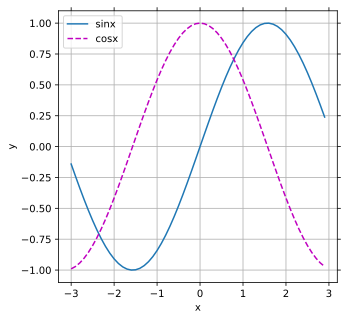

In [224]:
x= np.arange(-3,3,0.1)
x.attach_grad()
y = np.sin(x)
with autograd.record():
    z = np.sin(x)
z.backward()
d2l.plot(x,[y,x.grad],xlabel = 'x',ylabel= 'y', legend = ['sinx','cosx'],figsize = (5,5))


In [12]:
index = ["Hungary",'Korean','France','Australia','Amerian']
data = pd.DataFrame([
    [12240,4.9],
    [27195,5.8],
    [37675,6.5],
    [50962,7.3],
    [55805,7.2]
],index = index).reset_index()
data.rename(columns= {"index": "Country",0:"GDP",1:"Life satisfaction"})

,Country,GDP,Life satisfaction
0,Hungary,12240,4.9
1,Korean,27195,5.8
2,France,37675,6.5
3,Australia,50962,7.3
4,Amerian,55805,7.2
